# OCEAN Dataset Preparation & Cleaning

This notebook documents the step-by-step cleaning of the raw CSV (`Data_final.csv`) keeping only the required OCEAN score columns:
`O_score, C_score, E_score, A_score, N_score`. Subsequent modeling (e.g., K-Means) will build on the cleaned dataset saved as `ocean_clean.csv`.

> Run cells top-to-bottom. Adjust paths if you move files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('Data_final.csv')
data.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


In [4]:
data.describe()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,7.294857,7.538286,5.548952,6.863714,5.466381,5.939619,4.376476,5.163810,5.724190,6.794381
std,1.398485,1.215005,1.643137,1.515778,0.868926,1.958362,1.948409,1.747213,1.872927,1.495273
min,2.670000,3.560000,2.890000,3.230000,2.890000,2.890000,2.340000,3.010000,3.010000,3.450000
25%,6.670000,7.340000,4.230000,5.450000,4.670000,4.450000,3.120000,3.670000,4.340000,5.450000
50%,7.230000,7.670000,5.230000,6.450000,5.450000,5.120000,3.450000,4.450000,4.670000,7.450000
75%,8.670000,8.340000,7.010000,8.120000,6.010000,7.780000,4.450000,6.780000,7.670000,8.120000
max,9.450000,9.450000,9.340000,9.340000,8.120000,9.450000,9.230000,9.340000,9.340000,9.340000


In [5]:
Required_fields = ["O_score", "C_score", "E_score", "A_score", "N_score", "Career"]
data = data[Required_fields]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   O_score  105 non-null    float64
 1   C_score  105 non-null    float64
 2   E_score  105 non-null    float64
 3   A_score  105 non-null    float64
 4   N_score  105 non-null    float64
 5   Career   105 non-null    object 
dtypes: float64(5), object(1)
memory usage: 5.1+ KB


/home/aryan-khokhar/Documents/Projects/Github Project/Brain-Analysis-v3/K-means/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (90) found smaller than n_clusters (105). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


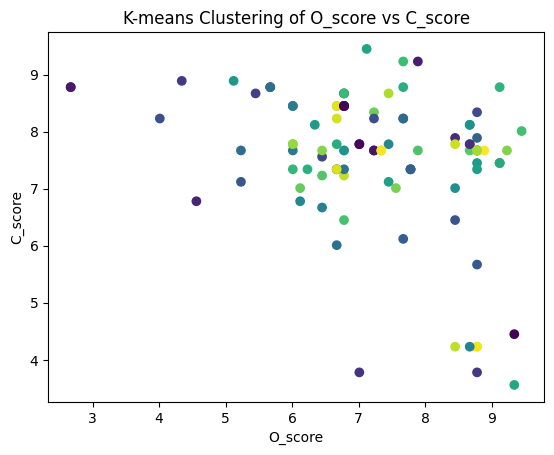

In [6]:
k_means = KMeans(n_clusters=105,random_state=42)
k_means.fit(data[["O_score", "C_score", "E_score", "A_score", "N_score"]])
data["Cluster"] = k_means.labels_
data.head()
plt.scatter(data["O_score"], data["C_score"], c=data["Cluster"], cmap='viridis')
plt.xlabel("O_score")
plt.ylabel("C_score")
plt.title("K-means Clustering of O_score vs C_score")
plt.show()

In [7]:
from scipy.spatial.distance import euclidean

def recommend_careers(user_vector, data, top_n=3):
    # user_vector = [O, C, E, A, N]
    data['distance'] = data.apply(
        lambda row: euclidean(user_vector, 
                              [row['O_score'], row['C_score'], row['E_score'], row['A_score'], row['N_score']]),
        axis=1
    )
    return data.sort_values('distance').head(top_n)[['Career','distance']]
user_vector = [0.7, 0.6, 0.8, 0.5, 0.4]  # Example user scores
recommendations = recommend_careers(user_vector, data)
print(recommendations)


                       Career   distance
14      Construction Engineer   9.511146
36        Industrial Engineer  11.159462
93  Quality Control Inspector  11.368905


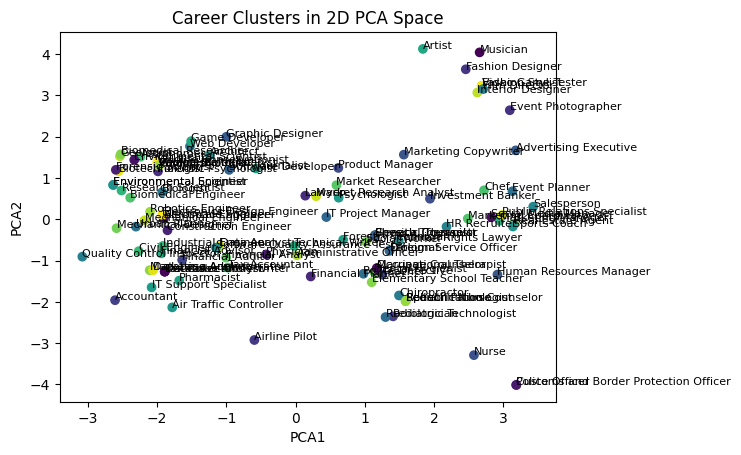

In [8]:
from sklearn.decomposition import PCA

X = data[["O_score", "C_score", "E_score", "A_score", "N_score"]]
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

plt.scatter(reduced[:,0], reduced[:,1], c=data["Cluster"], cmap='viridis')
for i, career in enumerate(data["Career"]):
    plt.text(reduced[i,0], reduced[i,1], career, fontsize=8)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Career Clusters in 2D PCA Space")
plt.show()
